<a href="https://colab.research.google.com/github/deadly-dagger/Implementation-of-Quantum-Machine-Learning-Algorithms/blob/main/Implementation_of_Quantum_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Synthetic Dataset

Installing Libraries

In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 9.7 MB/s 
     |████████████████████████████████| 18.0 MB 424 kB/s 
     |████████████████████████████████| 240 kB 68.5 MB/s 
     |████████████████████████████████| 112 kB 40.0 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 49 kB 7.3 MB/s 
     |████████████████████████████████| 49 kB 2.8 MB/s 
     |████████████████████████████████| 1.6 MB 16.9 MB/s 
     |████████████████████████████████| 943 kB 54.5 MB/s 
     |████████████████████████████████| 37.5 MB 20 kB/s 
     |████████████████████████████████| 4.1 MB 33.6 MB/s 
     |████████████████████████████████| 112 kB 51.2 MB/s 
  Created wheel for qiskit: filename=qiskit-0.37.1-py3-none-any.whl size=12067 sha256=45dc1a9de37a7e54d32d7f4f851b121bb49ffe72238efebf7d1bc5af1ba5e3b9
  Stored in directory: /root/.cache/pip/wheels/1c/3c/a3/bf8c29

In [ ]:
!pip install qiskit_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 12.9 MB/s 


## Dataset Preparation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import Aer, QuantumCircuit
from qiskit.opflow import Z, I, StateFn
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B

from qiskit_machine_learning.neural_networks import TwoLayerQNN, CircuitQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR

from typing import Union

from qiskit_machine_learning.exceptions import QiskitMachineLearningError

from IPython.display import clear_output

algorithm_globals.random_seed = 42

In [ ]:
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"), shots=1024)

[[ 0.5479121  -0.12224312]
 [ 0.71719584  0.39473606]
 [-0.8116453   0.9512447 ]
 [ 0.5222794   0.57212861]
 [-0.74377273 -0.09922812]
 [-0.25840395  0.85352998]
 [ 0.28773024  0.64552323]
 [-0.1131716  -0.54552256]
 [ 0.10916957 -0.87236549]
 [ 0.65526234  0.2633288 ]
 [ 0.51617548 -0.29094806]
 [ 0.94139605  0.78624224]
 [ 0.55676699 -0.61072258]
 [-0.06655799 -0.91239247]
 [-0.69142102  0.36609791]
 [ 0.48952431  0.93501946]
 [-0.34834928 -0.25908059]
 [-0.06088838 -0.62105728]
 [-0.74015699 -0.04859015]
 [-0.5461813   0.33962799]
 [-0.12569616  0.66535639]
 [ 0.4005302  -0.37526672]
 [ 0.6645196   0.60952871]
 [-0.22504324 -0.42334379]
 [ 0.36499101 -0.72049503]
 [-0.6001836  -0.98527546]
 [ 0.57384876  0.32970171]
 [ 0.41033076  0.56145806]
 [-0.08216845  0.13748239]
 [-0.720406   -0.77093985]
 [ 0.33680592 -0.05780759]
 [ 0.13047221  0.52999771]
 [ 0.26943664  0.1071588 ]
 [ 0.11841432 -0.3920998 ]
 [-0.93836433 -0.12656522]
 [-0.57083065 -0.18294271]
 [ 0.70680615 -0.53212103]
 

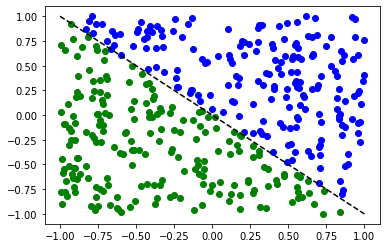

In [ ]:
num_inputs = 2
num_samples = 400
X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}
y = 2 * y01 - 1  # in {-1, +1}
y_one_hot = np.zeros((num_samples, 2))
for i in range(num_samples):
    y_one_hot[i, y01[i]] = 1
print(X)
for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

## Classical SVM

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [ 1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [-1 -1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [ 1  1]
 [-1 -1]
 [-1 -1]
 [ 1  1]
 [ 1 -1]
 [-1 -1]]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[40  4]
 [ 0 36]]
              precision    recall  f1-score   support

          -1       1.00      0.91      0.95        44
           1       0.90      1.00      0.95        36

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.96      0.95      0.95        80



##Quantum SVM

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.datasets import ad_hoc_data

seed = 12345
algorithm_globals.random_seed = seed

In [ ]:
data_feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement="linear")


backend = QuantumInstance(
    BasicAer.get_backend("qasm_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed
)

quantum_kernel = QuantumKernel(feature_map=data_feature_map, quantum_instance=backend)

In [ ]:
adhoc_svc = SVC(kernel=quantum_kernel.evaluate)
adhoc_svc.fit(X_train, y_train)
y_pred = adhoc_svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)
print(classification_report(y_test,y_pred))

[[32 12]
 [ 5 31]]
              precision    recall  f1-score   support

          -1       0.86      0.73      0.79        44
           1       0.72      0.86      0.78        36

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.80      0.79      0.79        80



##Variational Quantum Classifier

In [ ]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
# construct feature map, ansatz, and optimizer
feature_map = ZZFeatureMap(num_inputs)
ansatz = RealAmplitudes(num_inputs, reps=1)

# construct variational quantum classifier
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    loss="cross_entropy",
    optimizer=COBYLA(),
    quantum_instance=quantum_instance,
    callback=callback_graph,
)

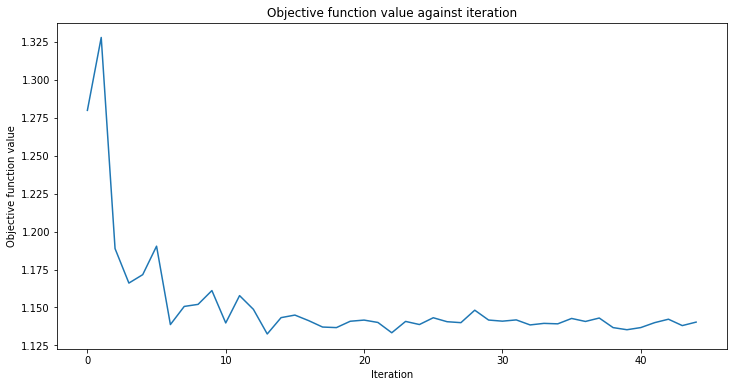

0.5025

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
vqc.fit(X, y_one_hot)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(X, y_one_hot)

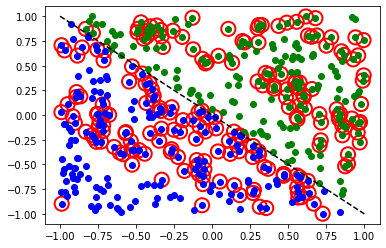

In [ ]:
# evaluate data points
y_predict = vqc.predict(X)

# plot results
# red == wrongly classified
for x, y_target, y_p in zip(X, y_one_hot, y_predict):
    if y_target[0] == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if not np.all(y_target == y_p):
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

#SONAR Dataset


 Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Import Dataset

In [ ]:
dataset = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", header=None)
dataset[60] = dataset[60].map({'R':0, 'M':1})
print('The dataset has been loaded')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


The dataset has been loaded


In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

##EDA

In [ ]:
df = pd.DataFrame(dataset)

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


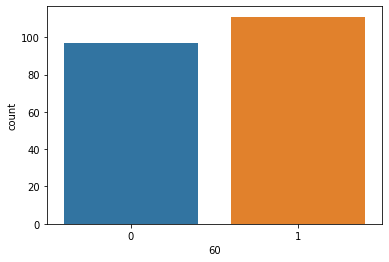

In [ ]:
sns.countplot(data=dataset,x=60)

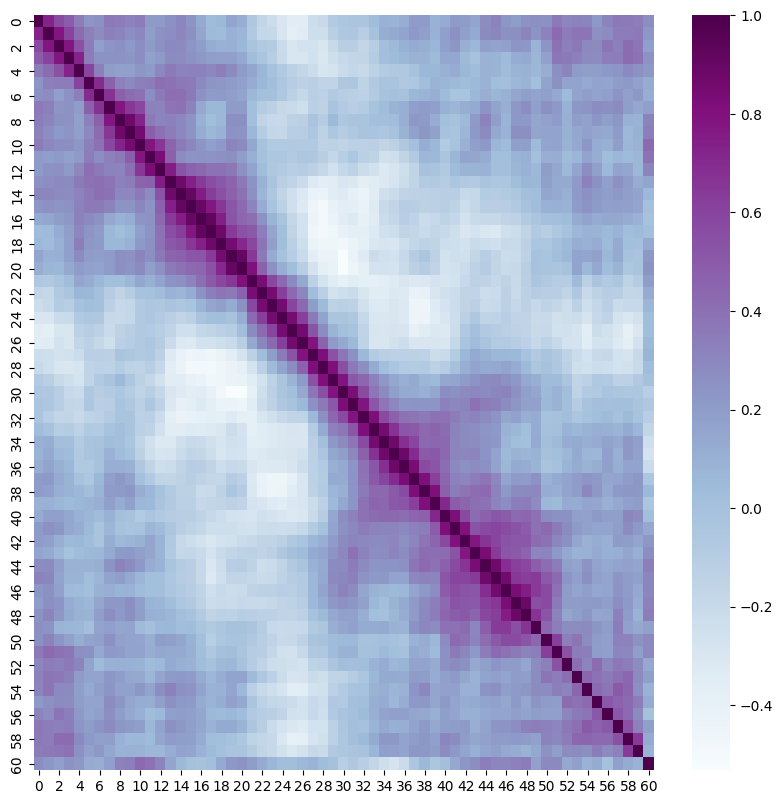

In [ ]:
fig = plt.figure(figsize=(10,10), dpi=100)

sns.heatmap(dataset.corr(),cmap="BuPu")


That purplish color alongside the diognal of our heat map shows that frequencies that are close to each other are somehow more correlated.

In [ ]:
dataset.corr()[60].sort_values(ascending=False)

60    1.000000
10    0.432855
11    0.392245
48    0.351312
9     0.341142
        ...   
30   -0.110728
33   -0.172010
36   -0.209055
34   -0.227670
35   -0.269151
Name: 60, Length: 61, dtype: float64

## Splitting Training and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train

array([[0.0307, 0.0523, 0.0653, ..., 0.0121, 0.0124, 0.0055],
       [0.0707, 0.1252, 0.1447, ..., 0.0131, 0.0154, 0.0218],
       [0.0762, 0.0666, 0.0481, ..., 0.0048, 0.0107, 0.0094],
       ...,
       [0.0228, 0.0106, 0.013 , ..., 0.0045, 0.0063, 0.0039],
       [0.0373, 0.0281, 0.0232, ..., 0.0054, 0.0085, 0.006 ],
       [0.018 , 0.0444, 0.0476, ..., 0.005 , 0.0073, 0.0022]])

In [ ]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

## SVM Model

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[13  8]
 [ 1 20]]
              precision    recall  f1-score   support

           0       0.93      0.62      0.74        21
           1       0.71      0.95      0.82        21

    accuracy                           0.79        42
   macro avg       0.82      0.79      0.78        42
weighted avg       0.82      0.79      0.78        42



##Quantum Support Vector Machine

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.datasets import ad_hoc_data

seed = 12345
algorithm_globals.random_seed = seed

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10)
X_train = selector.fit_transform(X_train,y_train)
X_test = selector.transform(X_test)

In [ ]:
data_feature_map = ZZFeatureMap(feature_dimension=10, reps=2, entanglement="linear")


backend = QuantumInstance(
    BasicAer.get_backend("qasm_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed
)

quantum_kernel = QuantumKernel(feature_map=data_feature_map, quantum_instance=backend)

In [ ]:
adhoc_svc = SVC(kernel=quantum_kernel.evaluate)
adhoc_svc.fit(X_train, y_train)
y_pred = adhoc_svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)
print(classification_report(y_test,y_pred)) 

[[11 10]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.85      0.52      0.65        21
           1       0.66      0.90      0.76        21

    accuracy                           0.71        42
   macro avg       0.75      0.71      0.70        42
weighted avg       0.75      0.71      0.70        42



#DIABETES Dataset

In [ ]:
import operator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV

In [ ]:
diabetes = pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
diabetes_mod.shape

(724, 9)

In [ ]:
feature_names = diabetes.columns[:8]
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
X = diabetes[feature_names]
y = diabetes.Outcome
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


##Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


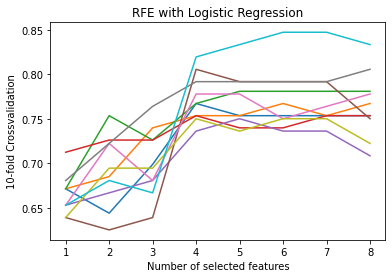

rfecv.grid_scores_: [[0.67123288 0.67123288 0.67123288 0.71232877 0.65277778 0.63888889
  0.65277778 0.68055556 0.63888889 0.65277778]
 [0.64383562 0.68493151 0.75342466 0.7260274  0.66666667 0.625
  0.72222222 0.72222222 0.69444444 0.68055556]
 [0.69863014 0.73972603 0.7260274  0.7260274  0.68055556 0.63888889
  0.68055556 0.76388889 0.69444444 0.66666667]
 [0.76712329 0.75342466 0.76712329 0.75342466 0.73611111 0.80555556
  0.77777778 0.79166667 0.75       0.81944444]
 [0.75342466 0.75342466 0.78082192 0.73972603 0.75       0.79166667
  0.77777778 0.79166667 0.73611111 0.83333333]
 [0.75342466 0.76712329 0.78082192 0.73972603 0.73611111 0.79166667
  0.75       0.79166667 0.75       0.84722222]
 [0.75342466 0.75342466 0.78082192 0.75342466 0.73611111 0.79166667
  0.76388889 0.79166667 0.75       0.84722222]
 [0.75342466 0.76712329 0.78082192 0.75342466 0.70833333 0.75
  0.77777778 0.80555556 0.72222222 0.83333333]]
rfecv.support_: [ True  True False False False  True  True False]

The

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_mod = diabetes_mod[feature_names]
y_mod = diabetes_mod.Outcome

strat_k_fold = StratifiedKFold(
    n_splits=10,
    random_state=None
)

logreg_model = LogisticRegression()

rfecv = RFECV(
    estimator=logreg_model,
    step=1,
    cv=strat_k_fold,
    scoring='accuracy'
)
rfecv.fit(X_mod, y_mod)

plt.figure()
plt.title('RFE with Logistic Regression')
plt.xlabel('Number of selected features')
plt.ylabel('10-fold Crossvalidation')

# grid_scores_ returns a list of accuracy scores
# for each of the features selected
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

plt.show()

print('rfecv.grid_scores_: {grid_scores}'.format(grid_scores=rfecv.grid_scores_))

# support_ is another attribute to find out the features
# which contribute the most to predicting
new_features = list(filter(
    lambda x: x[1],
    zip(feature_names, rfecv.support_)
))

print('rfecv.support_: {support}'.format(support=rfecv.support_))

# Features are the most suitable for predicting the response class
new_features = list(map(operator.itemgetter(0), new_features))
print('\nThe most suitable features for prediction: {new_features}'.format(new_features=new_features))

In [ ]:
best_features = [
    'Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction'
]

X = StandardScaler().fit_transform(X[best_features])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.20
)

In [ ]:
from sklearn.model_selection import GridSearchCV

c_values = list(np.arange(1, 100))

param_grid = [
    {
        'C': c_values,
        'penalty': ['l1'],
        'solver': ['liblinear'],
        'multi_class': ['ovr'],
        'random_state': [42]
    },
    {
        'C': c_values,
        'penalty': ['l2'],
        'solver': ['liblinear', 'newton-cg', 'lbfgs'],
        'multi_class': ['ovr'],
        'random_state': [42]
    }
]

grid = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=strat_k_fold,
    scoring='f1'
)
grid.fit(X, y)

# Best LogisticRegression parameters
print(grid.best_params_)
# Best score for LogisticRegression with best parameters
print('Best score: {:.2f}%'.format(grid.best_score_ * 100))

{'C': 1, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg'}
Best score: 62.25%


In [ ]:
log_reg = LogisticRegression(
    # Parameters chosen based on GridSearchCV result
    C=1,
    multi_class='ovr',
    penalty='l2',
    solver='newton-cg',
    random_state=42
)
log_reg.fit(X_train, y_train)

log_reg_predict = log_reg.predict(X_test)
log_reg_predict_proba = log_reg.predict_proba(X_test)[:, 1]

In [ ]:
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, log_reg_predict) * 100))
print('AUC: {:.2f}%'.format(roc_auc_score(y_test, log_reg_predict_proba) * 100))
print('Classification report:\n\n', classification_report(y_test, log_reg_predict))
print('Training set score: {:.2f}%'.format(log_reg.score(X_train, y_train) * 100))
print('Testing set score: {:.2f}%'.format(log_reg.score(X_test, y_test) * 100))

Accuracy: 77.27%
AUC: 85.05%
Classification report:

               precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Training set score: 76.71%
Testing set score: 77.27%


##QSVM

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.datasets import ad_hoc_data

seed = 12345
algorithm_globals.random_seed = seed

In [ ]:
data_feature_map = ZZFeatureMap(feature_dimension=10, reps=2, entanglement="linear")


backend = QuantumInstance(
    BasicAer.get_backend("qasm_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed
)

quantum_kernel = QuantumKernel(feature_map=data_feature_map, quantum_instance=backend)

In [ ]:
from sklearn.svm import SVC
adhoc_svc = SVC(kernel=quantum_kernel.evaluate)
adhoc_svc.fit(X_train, y_train)
y_pred = adhoc_svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)
print(classification_report(y_test,y_pred)) 

[[98  1]
 [49  6]]
              precision    recall  f1-score   support

           0       0.67      0.99      0.80        99
           1       0.86      0.11      0.19        55

    accuracy                           0.68       154
   macro avg       0.76      0.55      0.50       154
weighted avg       0.73      0.68      0.58       154



# Grover's Algorithm 



(Just a random idea that we thought might help to improve searching speed in preprocessing data, or ML algorithms, implemented it for reference)

In [ ]:
import random
my_list  = [i for i in range(20000)]
random.shuffle(my_list)
my_list


def the_oracle(num) :
  winner = 1927
  if num == winner :
    return True
  else :
    return False

  
for index, trial_no in enumerate(my_list) :
  if the_oracle(trial_no) is True :
    print('Winner found at index ', index)
    print(index+1, ' calls to the oracle')
    break

Winner found at index  15356
15357  calls to the oracle


In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from qiskit import *
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
oracle  = QuantumCircuit(2, name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [ ]:
backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

In [ ]:
job = execute(grover_circ, backend)
result = job.result()

In [ ]:
sv = result.get_statevector()
np.around(sv,2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [ ]:
reflection = QuantumCircuit(2, name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()

Instruction(name='reflection', num_qubits=2, num_clbits=0, params=[])

In [ ]:
reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [ ]:
backend = Aer.get_backend('qasm_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle, [0,1])
grover_circ.append(reflection,[0,1])
grover_circ.measure([0,1],[0,1])

In [ ]:
grover_circ.draw()

┌───┐┌─────────┐┌─────────────┐┌─┐   
q_0: ┤ H ├┤0        ├┤0            ├┤M├───
     ├───┤│  oracle ││  reflection │└╥┘┌─┐
q_1: ┤ H ├┤1        ├┤1            ├─╫─┤M├
     └───┘└─────────┘└─────────────┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

In [ ]:
job = execute(grover_circ, backend, shots=1)
result = job.result()
result.get_counts()

{'11': 1}